In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [153]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


We can see that there are 31647 rows and 18 columns. This is our training data, we will use this data to train our model and 'Subscribed' is our target column.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


We can see from above details that there are no null values present but there are object type columns available so we will encode them in the following steps. Also ID and Month columns are not needed for prediction so we will drop them

In [154]:
df.drop(['ID'],axis=1,inplace=True)
df.drop(['month'],axis=1,inplace=True)

In [10]:
df.nunique()

age             76
job             12
marital          3
education        4
default          2
balance       6326
housing          2
loan             2
contact          3
day             31
duration      1454
campaign        45
pdays          509
previous        38
poutcome         4
subscribed       2
dtype: int64

## Encoding

In [26]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [155]:
df_enc=df.replace({'subscribed':{'no':0,'yes':1}})
for i in df_enc.columns:
    if df_enc[i].dtypes=='object':
        df_enc[i]=oe.fit_transform(df_enc[i].values.reshape(-1,1))

In [156]:
df_enc

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0.0,1.0,3.0,0.0,1933,0.0,0.0,1.0,19,44,2,-1,0,3.0,0
1,31,11.0,1.0,1.0,0.0,3,0.0,0.0,0.0,20,91,2,-1,0,3.0,0
2,27,7.0,1.0,1.0,0.0,891,1.0,0.0,0.0,18,240,1,-1,0,3.0,0
3,57,4.0,0.0,2.0,0.0,3287,0.0,0.0,0.0,22,867,1,84,3,2.0,1
4,31,9.0,1.0,1.0,0.0,119,1.0,0.0,0.0,4,380,1,-1,0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4.0,2.0,2.0,0.0,0,1.0,0.0,0.0,12,116,2,-1,0,3.0,0
31643,53,4.0,0.0,2.0,0.0,380,0.0,1.0,0.0,5,438,2,-1,0,3.0,1
31644,32,4.0,2.0,2.0,0.0,312,0.0,0.0,0.0,7,37,3,-1,0,3.0,0
31645,57,9.0,1.0,1.0,0.0,225,1.0,0.0,1.0,15,22,7,337,12,0.0,0


Data has been encoded

## Correlation

In [35]:
df_enc.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,subscribed
age,1.000000,-0.020765,-0.406024,-0.102356,-0.016117,0.103245,-0.183775,-0.012657,0.026733,-0.011056,-0.003870,0.005733,-0.021947,0.005761,0.006466,0.024538
job,-0.020765,1.000000,0.066124,0.170347,-0.005217,0.020638,-0.125347,-0.039049,-0.078253,0.020951,0.002694,0.001469,-0.022552,-0.003032,0.007101,0.038921
marital,-0.406024,0.066124,1.000000,0.107547,-0.009591,0.003487,-0.017846,-0.041654,-0.040180,-0.007686,0.011544,-0.009394,0.019741,0.012717,-0.019770,0.046043
education,-0.102356,0.170347,0.107547,1.000000,-0.006774,0.065176,-0.095376,-0.045950,-0.112000,0.017902,0.003842,0.006142,-0.001566,0.015280,-0.019007,0.066051
default,-0.016117,-0.005217,-0.009591,-0.006774,1.000000,-0.069422,-0.011823,0.081567,0.014053,0.009996,-0.010849,0.018538,-0.029622,-0.015877,0.035067,-0.020168
balance,0.103245,0.020638,0.003487,0.065176,-0.069422,1.000000,-0.067466,-0.083631,-0.024083,0.003461,0.024274,-0.012032,0.001789,0.013843,-0.019629,0.050807
housing,-0.183775,-0.125347,-0.017846,-0.095376,-0.011823,-0.067466,1.000000,0.036244,0.195103,-0.025666,0.003021,-0.021076,0.118790,0.034231,-0.092677,-0.141092
loan,-0.012657,-0.039049,-0.041654,-0.045950,0.081567,-0.083631,0.036244,1.000000,-0.009213,0.014769,-0.012781,0.009340,-0.020078,-0.009258,0.010919,-0.072266
contact,0.026733,-0.078253,-0.040180,-0.112000,0.014053,-0.024083,0.195103,-0.009213,1.000000,-0.027046,-0.016503,0.022666,-0.245076,-0.141098,0.272083,-0.150051
day,-0.011056,0.020951,-0.007686,0.017902,0.009996,0.003461,-0.025666,0.014769,-0.027046,1.000000,-0.032288,0.159168,-0.087626,-0.048752,0.077586,-0.029600


<Axes: >

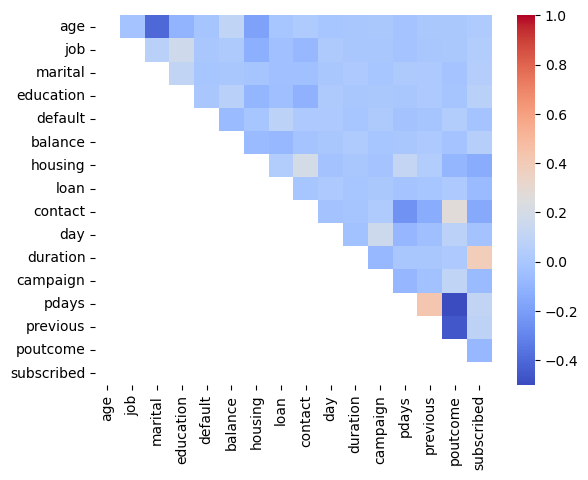

In [36]:
sb.heatmap(df_enc.corr(),mask=np.tril(df_enc.corr()),vmin=-.5,vmax=1,cmap='coolwarm')

In [37]:
df_enc.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,4.332923,1.167220,1.225013,0.018485,1363.890258,0.555629,0.162132,0.644642,15.835466,258.113534,2.765697,39.576042,0.574272,2.566152,0.117389
std,10.625134,3.271868,0.607186,0.749195,0.134700,3028.304293,0.496904,0.368578,0.899480,8.337097,257.118973,3.113830,99.317592,2.422529,0.982069,0.321888
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,73.000000,0.000000,0.000000,0.000000,8.000000,104.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,450.000000,1.000000,0.000000,0.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1431.000000,1.000000,0.000000,2.000000,21.000000,318.500000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


From above details we can notice that-
1) There is skewness present in some of the columns as mean and median (50%) values are different.
2) Standard deviation of each column.
3) There are outliers in some columns as 75%  values and maximum values are very far off.

## Bivariate analysis 

<Axes: xlabel='job', ylabel='count'>

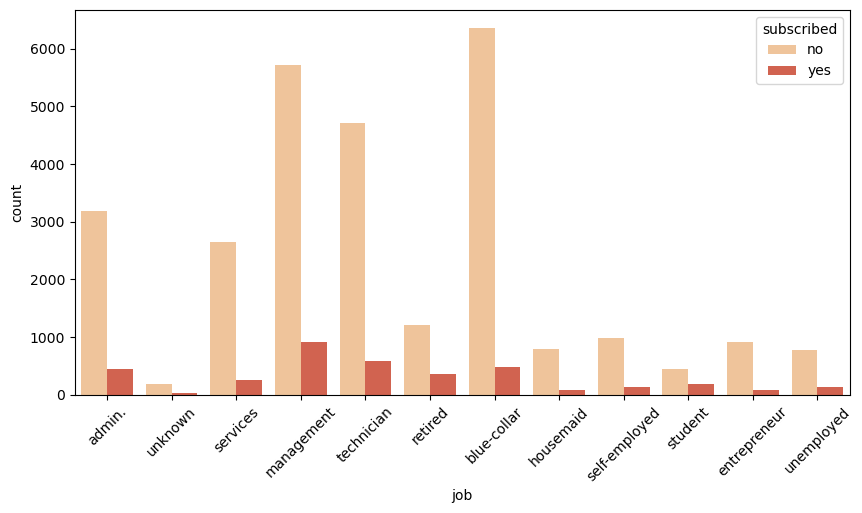

In [106]:
pt.figure(figsize=(10,5))
pt.xticks(rotation=45)
sb.countplot(data=df,x='job',hue='subscribed',palette='OrRd')

From above we see that most of the people who have subscribed are from management profession

<Axes: xlabel='marital', ylabel='count'>

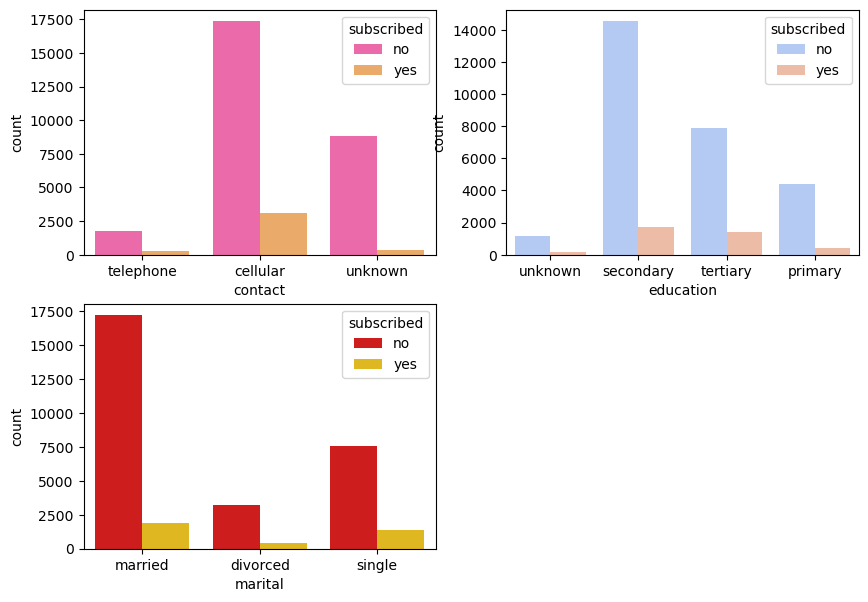

In [123]:
pt.figure(figsize=(10,7))
pt.subplot(221)
sb.countplot(data=df,x='contact',hue='subscribed',palette='spring')
pt.subplot(222)
sb.countplot(data=df,x='education',hue='subscribed',palette='coolwarm')
pt.subplot(223)
sb.countplot(data=df,x='marital',hue='subscribed',palette='hot')

Hence most subcriptions are there when contacted with cellular phones, have atleast secondry education and are married

<Axes: xlabel='default', ylabel='age'>

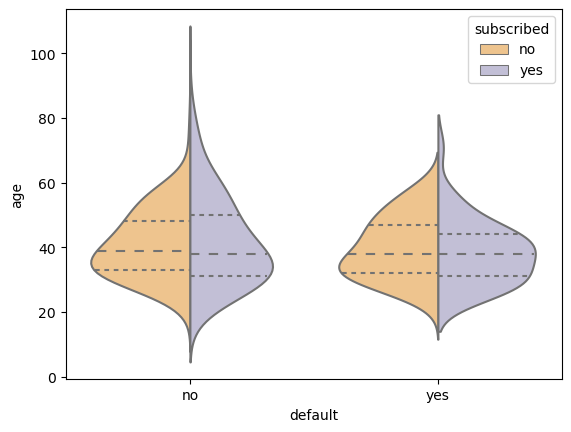

In [125]:
sb.violinplot(y='age',x='default',hue='subscribed',data=df,split=True,bw=.5,inner='quartile',palette='PuOr')

## Skewness

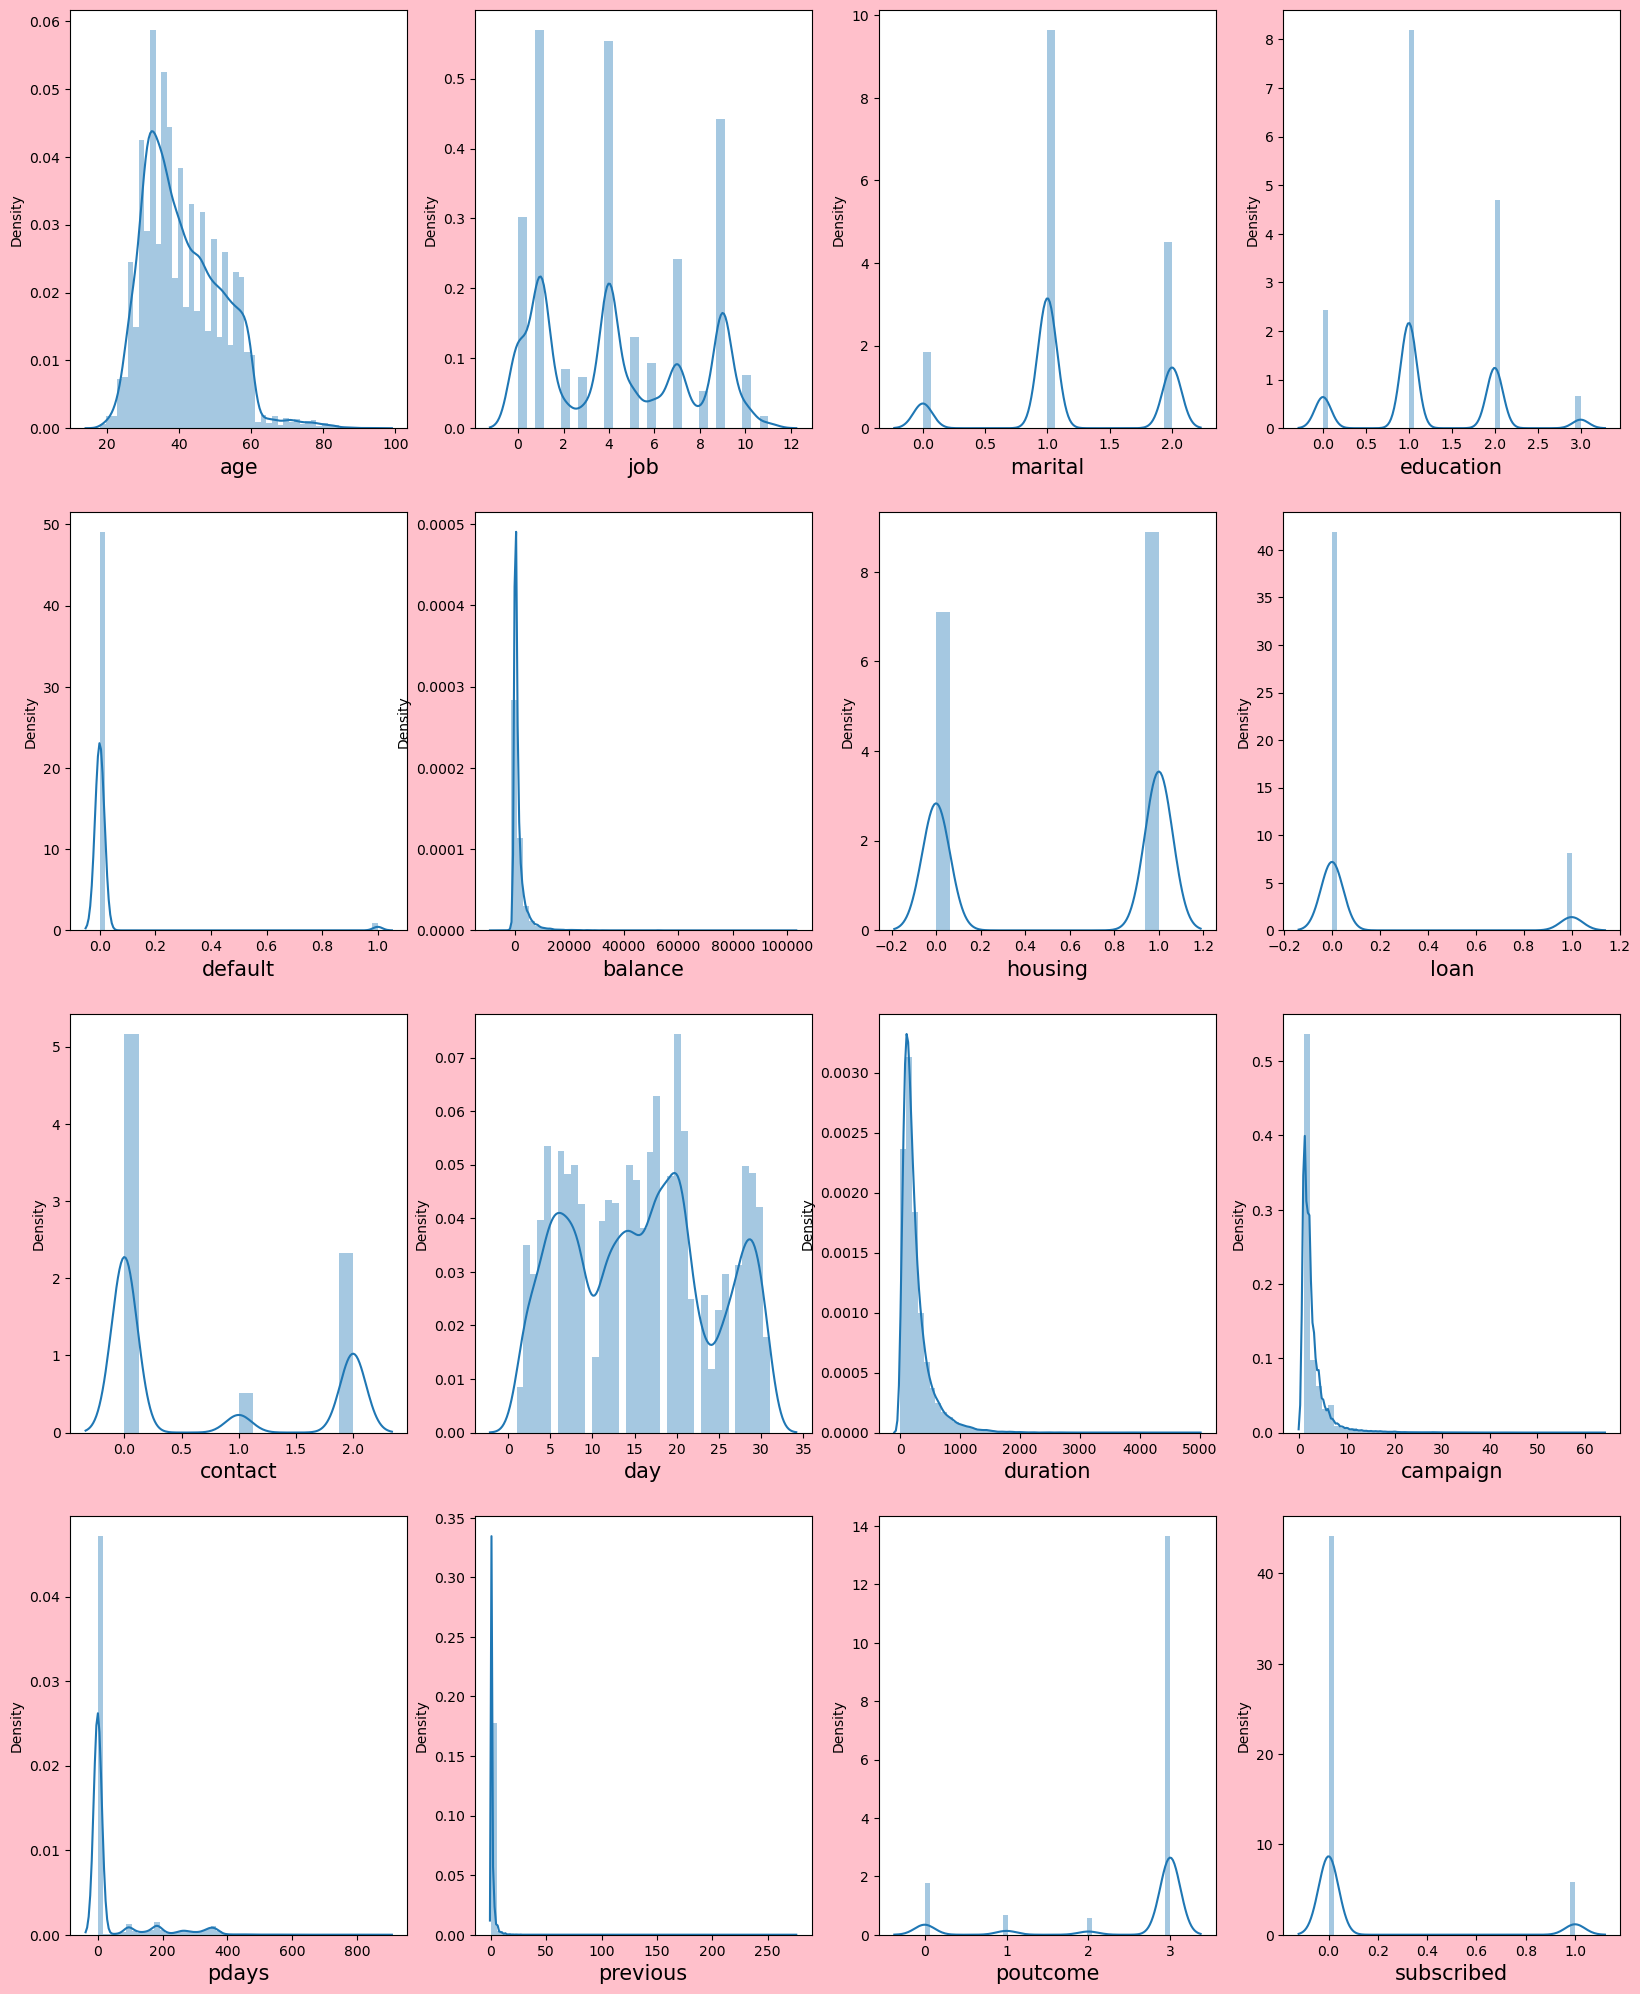

In [146]:
pt.figure(figsize=(20,25),facecolor='pink')
ptno=1

for c in df_enc:
    if ptno<=16:
        ax=pt.subplot(4,4,ptno)
        sb.distplot(df_enc[c])
        pt.xlabel(c,fontsize=15)
        
    ptno+=1

In [157]:
df_enc.skew()

age            0.681607
job            0.264817
marital       -0.100071
education      0.199441
default        7.149903
balance        7.995696
housing       -0.223918
loan           1.833474
contact        0.758602
day            0.087185
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
poutcome      -1.996421
subscribed     2.377445
dtype: float64

From above we can see that there is a lot of skewness present in some columns, so we will remove from the non-categorical columns

In [158]:
df_enc['balance']=np.cbrt(df_enc['balance'])
df_enc['duration']=np.cbrt(df_enc['duration'])
df_enc['campaign']=np.cbrt(df_enc['campaign'])
df_enc['pdays']=np.cbrt(df_enc['pdays'])
df_enc['previous']=np.cbrt(df_enc['previous'])

In [159]:
df_enc.skew()

age           0.681607
job           0.264817
marital      -0.100071
education     0.199441
default       7.149903
balance      -0.086014
housing      -0.223918
loan          1.833474
contact       0.758602
day           0.087185
duration      0.647275
campaign      1.667938
pdays         1.779036
previous      2.079738
poutcome     -1.996421
subscribed    2.377445
dtype: float64

Skewness is pretty much reduced now

## Outliers

age              Axes(0.125,0.653529;0.110714x0.226471)
job           Axes(0.257857,0.653529;0.110714x0.226471)
marital       Axes(0.390714,0.653529;0.110714x0.226471)
education     Axes(0.523571,0.653529;0.110714x0.226471)
default       Axes(0.656429,0.653529;0.110714x0.226471)
balance       Axes(0.789286,0.653529;0.110714x0.226471)
housing          Axes(0.125,0.381765;0.110714x0.226471)
loan          Axes(0.257857,0.381765;0.110714x0.226471)
contact       Axes(0.390714,0.381765;0.110714x0.226471)
day           Axes(0.523571,0.381765;0.110714x0.226471)
duration      Axes(0.656429,0.381765;0.110714x0.226471)
campaign      Axes(0.789286,0.381765;0.110714x0.226471)
pdays                Axes(0.125,0.11;0.110714x0.226471)
previous          Axes(0.257857,0.11;0.110714x0.226471)
poutcome          Axes(0.390714,0.11;0.110714x0.226471)
subscribed        Axes(0.523571,0.11;0.110714x0.226471)
dtype: object

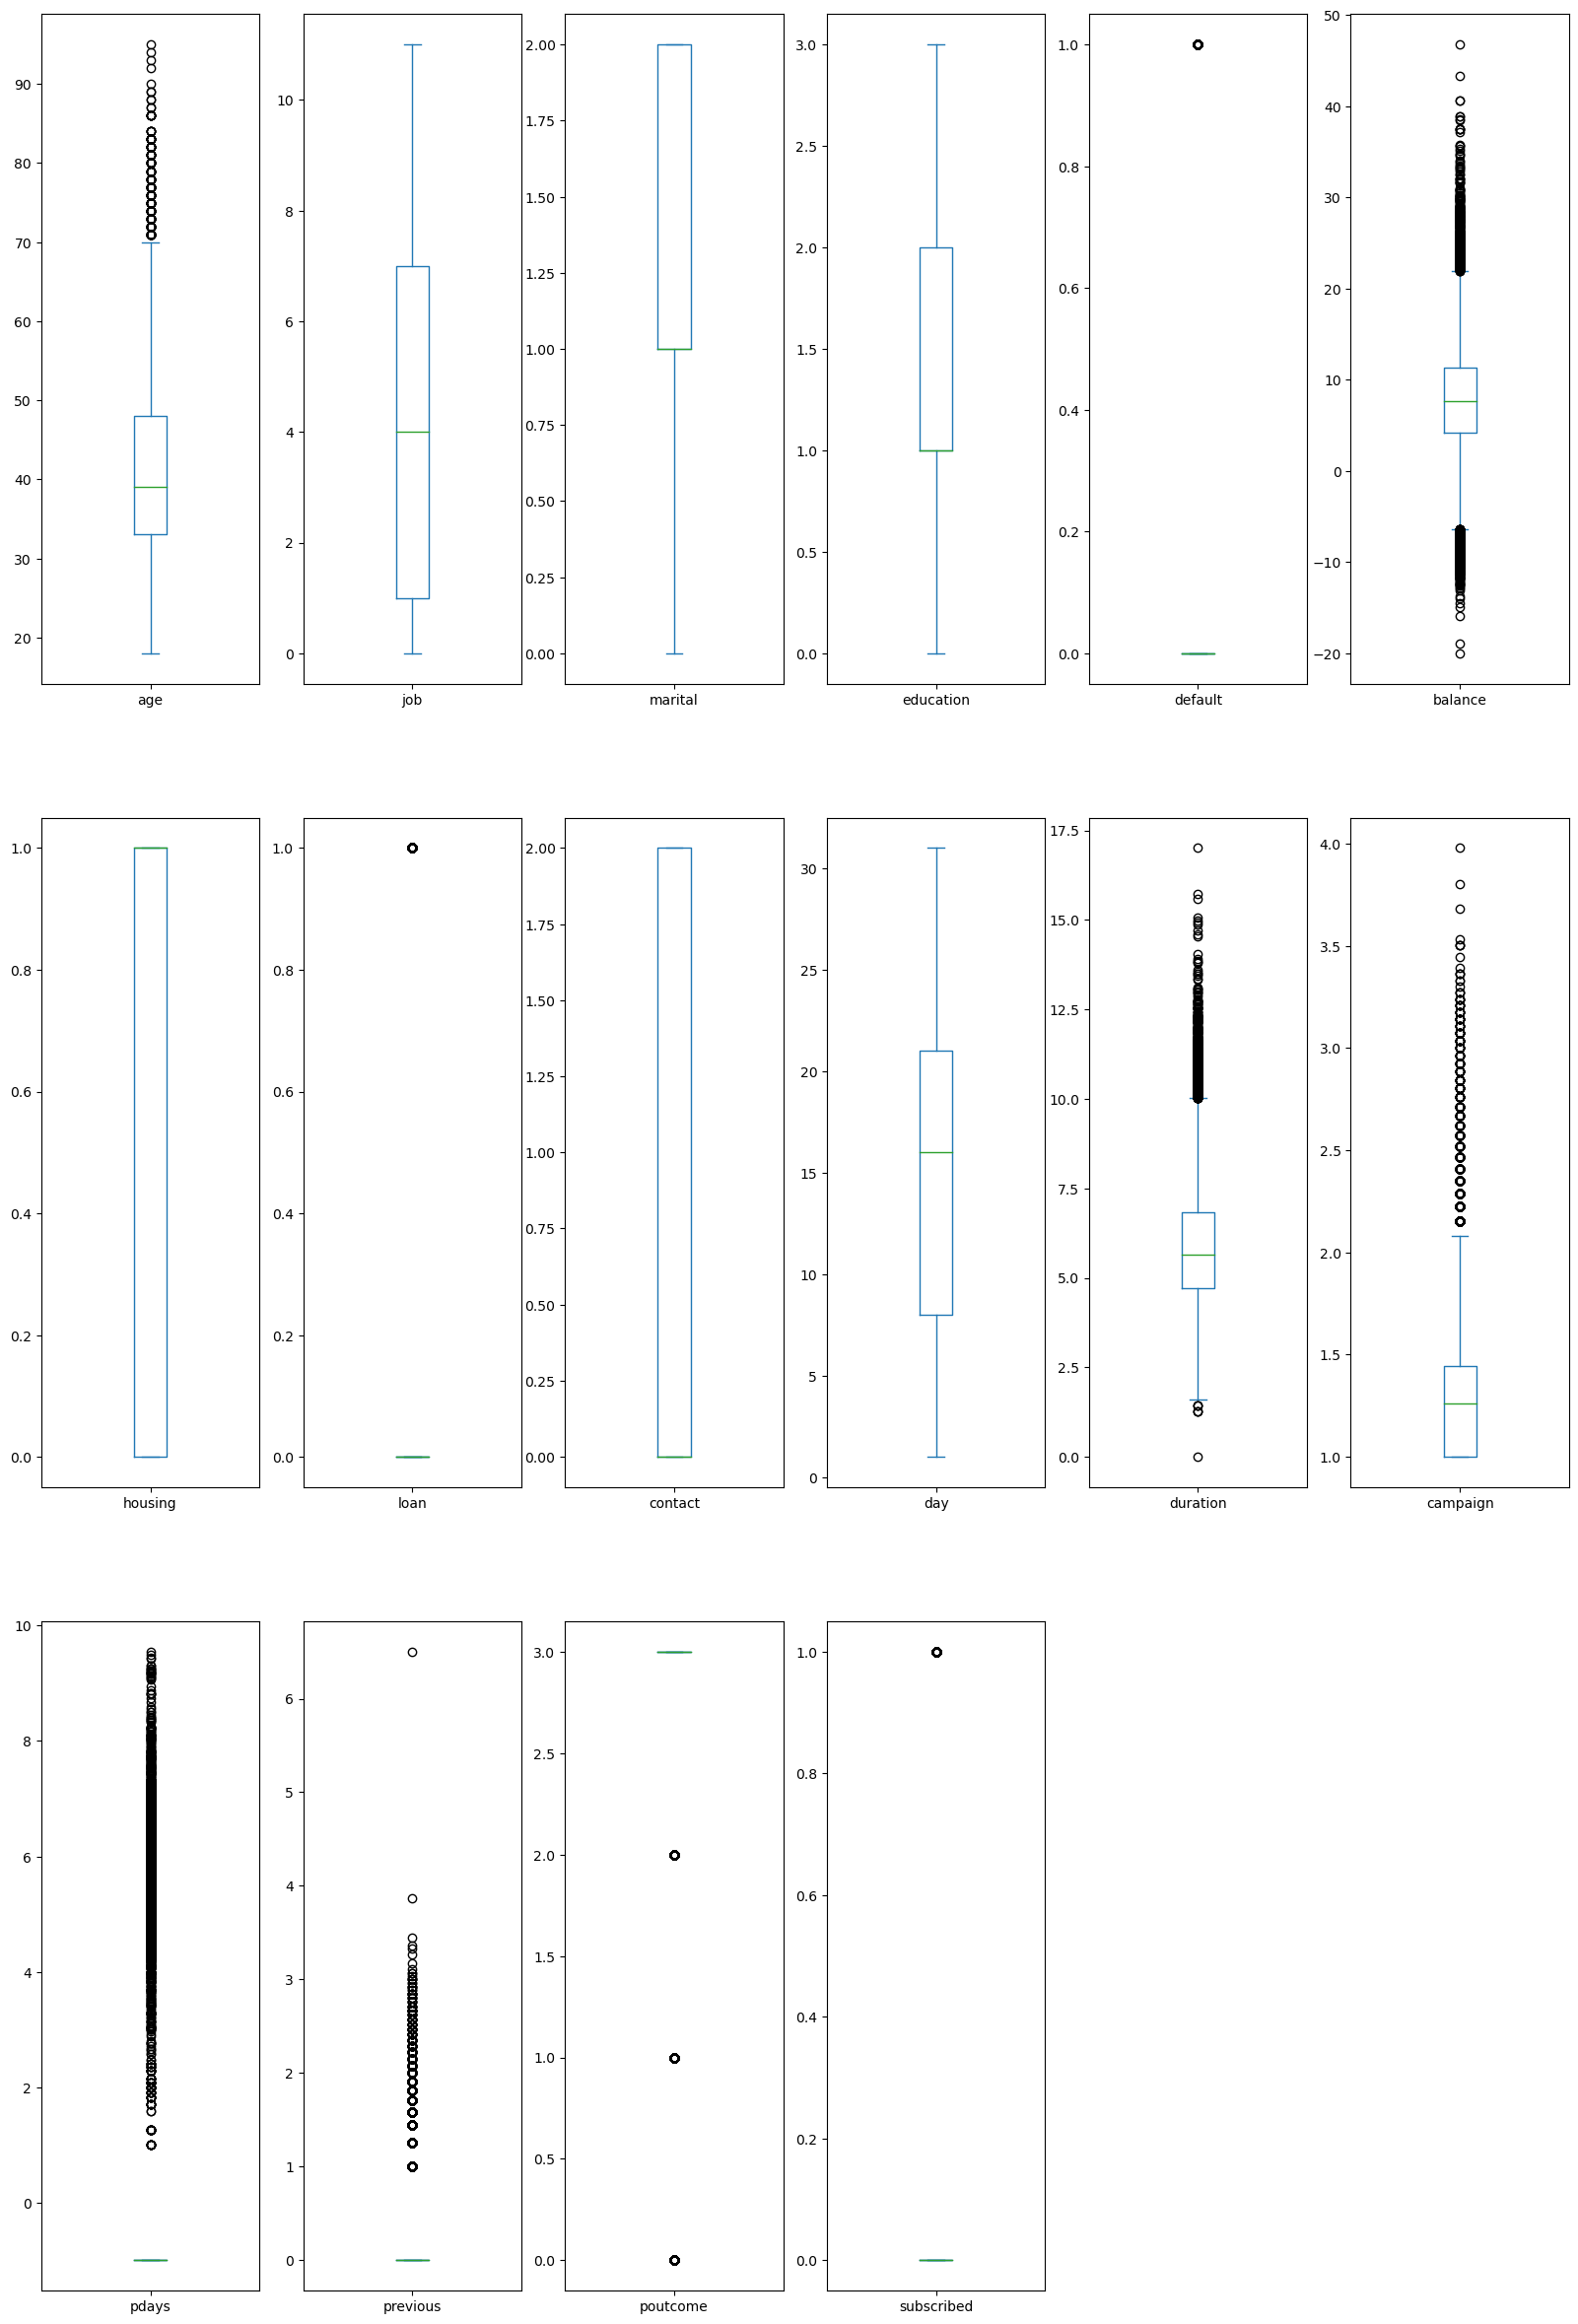

In [175]:
df_enc.plot(kind='box',subplots=True,layout=(3,6),figsize=(20,30))

we can see that there are outliers present so we will remove them now

In [176]:
from scipy.stats import zscore
z=np.abs(zscore(df_enc))
threshold=3
print(np.where(z>3))
df_new=df_enc[(z<3).all(axis=1)]
df_new.shape

(array([   10,    21,   109, ..., 31622, 31645, 31646], dtype=int64), array([ 4, 11,  4, ...,  0, 13, 10], dtype=int64))


(29295, 16)

In [179]:
#Checking for Data loss
(31647-29295)/31647*100

7.43198407431984

Its acceptable as its below10%

## Balancing the data

0    26045
1     3250
Name: subscribed, dtype: int64

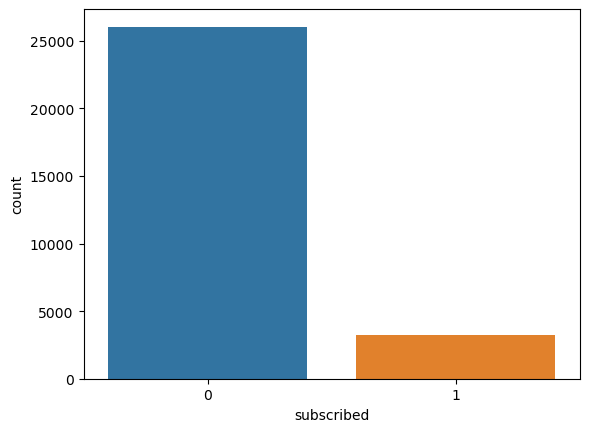

In [184]:
sb.countplot(x=df_new['subscribed'])
df_new['subscribed'].value_counts()

From above we see that its an imbalanced data so we will use near miss technique to balance it

In [185]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss

In [186]:
f=df_new.iloc[:,:-1]
l=df_new.iloc[:,-1]

In [187]:
nm=NearMiss(sampling_strategy=0.75)
train_x,train_y=nm.fit_resample(f,l)
train_y.value_counts()

0    4333
1    3250
Name: subscribed, dtype: int64

Its balanced now

In [205]:
df_bal=pd.DataFrame(data=train_x)
df_bal['subscribed']=train_y
df_bal

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,subscribed
0,48,3.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.0,28,6.910423,1.709976,-1.000000,0.0,3.0,0
1,30,9.0,2.0,1.0,0.0,9.483814,0.0,0.0,0.0,3,7.000000,1.000000,-1.000000,0.0,3.0,0
2,35,4.0,1.0,2.0,0.0,7.910460,0.0,0.0,0.0,2,6.557672,1.000000,-1.000000,0.0,3.0,0
3,26,1.0,2.0,1.0,0.0,7.905129,0.0,0.0,0.0,2,6.188463,1.000000,-1.000000,0.0,3.0,0
4,30,4.0,2.0,2.0,0.0,7.027106,0.0,0.0,0.0,22,6.118033,1.259921,-1.000000,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7578,36,4.0,2.0,2.0,0.0,19.579557,1.0,0.0,0.0,6,9.431642,1.259921,5.728654,1.0,2.0,1
7579,38,4.0,2.0,2.0,0.0,8.522432,1.0,0.0,2.0,6,7.719443,1.587401,-1.000000,0.0,3.0,1
7580,65,4.0,0.0,2.0,0.0,4.481405,1.0,0.0,0.0,22,7.465022,1.000000,-1.000000,0.0,3.0,1
7581,33,1.0,1.0,1.0,0.0,0.000000,1.0,0.0,2.0,21,8.046603,1.442250,-1.000000,0.0,3.0,1


## Standardizing the data

In [191]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [192]:
scaled_x = sc.fit_transform(train_x)
scaled_x

array([[ 0.96116597, -0.44807744, -0.47337044, ..., -0.45409925,
         0.41079541, -0.86605871],
       [-0.78087875,  1.44272458,  1.17095756, ..., -0.45409925,
         0.41079541, -0.86605871],
       [-0.29697744, -0.13294377, -0.47337044, ..., -0.45409925,
         0.41079541, -0.86605871],
       ...,
       [ 2.60643044, -0.13294377, -2.11769843, ..., -0.45409925,
         0.41079541,  1.15465613],
       [-0.49053797, -1.07834478, -0.47337044, ..., -0.45409925,
         0.41079541,  1.15465613],
       [ 1.44506729, -0.13294377, -2.11769843, ..., -0.45409925,
         0.41079541,  1.15465613]])

## Checking for multicollinearity using VIF

In [194]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = train_x.columns
vif['vif'] = [variance_inflation_factor(scaled_x,i) for i in range(scaled_x.shape[1])]
vif

,Features,vif
0,age,1.411290
1,job,1.074668
2,marital,1.322195
3,education,1.093358
4,default,NaN
5,balance,1.044809
6,housing,1.193140
7,loan,1.021691
8,contact,1.117869
9,day,1.015314


As pdays is having vif factor more than 10 we will remove it

In [206]:
df_bal.drop(['pdays'],axis=1,inplace=True)
x=sc.fit_transform(df_bal.iloc[:,:-1])
y=df_bal.iloc[:,-1]

## Model Building

In [207]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [208]:
models=[LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),DecisionTreeClassifier(), SVC()]

In [209]:
maxAcc = 0
maxRS = 0

for i in range(1,50):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .25, random_state=i)
    for m in models:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        pred = m.predict(x_test)
        acc = accuracy_score(y_test,pred)
        if acc>maxAcc:
            maxAcc = acc
            maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)

Best Accuracy is: 0.8201476793248945 on Random State: 14


So the best random state is 14

In [212]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state=14)

In [213]:
for m in models:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of', m, 'is: ',accuracy_score(y_test,predm))
    print ('\n','Confusion matrix:','\n',confusion_matrix(y_test,predm))
    print ('\n','Classification Report:','\n',classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:  0.7758241758241758

 Confusion matrix: 
 [[1122  201]
 [ 309  643]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.85      0.81      1323
           1       0.76      0.68      0.72       952

    accuracy                           0.78      2275
   macro avg       0.77      0.76      0.77      2275
weighted avg       0.77      0.78      0.77      2275



Accuracy score of RandomForestClassifier() is:  0.8083516483516483

 Confusion matrix: 
 [[1141  182]
 [ 254  698]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      1323
           1       0.79      0.73      0.76       952

    accuracy                           0.81      2275
   macro avg       0.81      0.80      0.80      2275
weighted avg       0.81      0.81      0.81      2275



Accuracy score of KNeighborsClassifier() is:  0.774065934065

## CrossVal Score

In [218]:
from sklearn.model_selection import cross_val_score
rfc=RandomForestClassifier()

In [215]:
for m in models:
    cvs=cross_val_score(m,x,y)
    print('For',m,'\n',cvs)
    print(cvs.mean(),'\n')

For LogisticRegression() 
 [0.7495056  0.75741595 0.76137113 0.75197889 0.77572559]
0.7591994336829911 

For RandomForestClassifier() 
 [0.79103494 0.80355966 0.79367172 0.78364116 0.80079156]
0.7945398065547367 

For KNeighborsClassifier() 
 [0.71984179 0.73961767 0.74818721 0.73680739 0.76385224]
0.7416612603336331 

For DecisionTreeClassifier() 
 [0.69545155 0.71127225 0.71984179 0.71635884 0.72031662]
0.7126482103443298 

For SVC() 
 [0.79499011 0.78707976 0.78642057 0.78100264 0.78693931]
0.7872864788335538 



As per cross val score we see that Random Forest classifier is our best model so we will use that.

## Hyperparameter Tuning

In [216]:
from sklearn.model_selection import GridSearchCV

In [219]:
param={'max_features':['auto','sqrt','log2'],
      'max_depth':(10,100),
      'criterion':['gini','entropy'],}
gs=GridSearchCV(rfc,param,cv=5)
gs.fit(x_train,y_train)
gs.best_params_

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2'}

In [221]:
final_model=RandomForestClassifier(max_features='auto',criterion='gini',max_depth=10)
final_model.fit(x_train, y_train)
fmod_pred = final_model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 82.19780219780219


After hyperparameter tuning our model is giving 82% accuracy

## Saving the model

In [222]:
import pickle
pickle.dump(final_model,'Bank_Marketing.obj')

['Bank_Marketing.obj']

## Predicting the test dataset

In [226]:
testdf=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')
testdf

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [227]:
for i in testdf.columns:
    if testdf[i].dtypes=='object':
        testdf[i]=oe.fit_transform(testdf[i].values.reshape(-1,1))

In [228]:
testdf.drop(['ID'],axis=1,inplace=True)
testdf.drop(['pdays'],axis=1,inplace=True)
testdf.drop(['month'],axis=1,inplace=True)

In [231]:
test= pickle.load("bank_marketing.obj")
outcome=test.predict(testdf)
outcome

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [234]:
testdf['subscribed']=outcome
testdf

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,previous,poutcome,subscirbed,subscribed
0,32,7.0,1.0,1.0,0.0,118,1.0,0.0,0.0,15,20,6,0,3.0,1,1
1,78,5.0,0.0,0.0,0.0,2787,0.0,0.0,1.0,1,372,1,0,3.0,1,1
2,31,6.0,2.0,2.0,0.0,144,1.0,0.0,2.0,16,676,1,0,3.0,1,1
3,57,7.0,2.0,0.0,0.0,3777,1.0,0.0,1.0,13,65,2,0,3.0,1,1
4,45,1.0,0.0,1.0,0.0,-705,0.0,1.0,2.0,3,111,1,0,3.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,4.0,1.0,2.0,0.0,45,0.0,0.0,0.0,28,148,4,0,3.0,1,1
13560,54,1.0,1.0,0.0,0.0,2281,1.0,0.0,2.0,20,158,1,0,3.0,1,1
13561,35,5.0,1.0,0.0,0.0,285,1.0,0.0,0.0,29,136,1,0,3.0,1,1
13562,29,0.0,2.0,1.0,0.0,464,0.0,0.0,0.0,9,208,2,3,2.0,1,1


Test dataset has been predicted